In [1]:
import math
def gumbel_inverse_transform(F, mu=0.0, b=1.0):
    return mu - b * math.log(-math.log(F))
def gumbel_inverse_transform2(F, mu=0.0, b=1.0):
    return mu - b * torch.log(-torch.log(F))


In [2]:
import torch

(array([10150., 10234., 10153., 10176., 10178., 10289., 10174., 10323.,
        10111., 10212.]),
 array([1.69873238e-05, 1.00014597e-01, 2.00012207e-01, 3.00009817e-01,
        4.00007427e-01, 5.00005037e-01, 6.00002646e-01, 7.00000256e-01,
        7.99997866e-01, 8.99995476e-01, 9.99993086e-01]),
 <BarContainer object of 10 artists>)

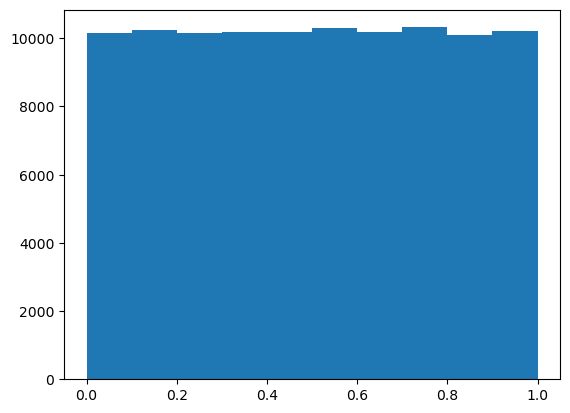

In [10]:
def sample():
    return torch.rand((1,)).item()
def sample3():
    return torch.rand((3,))
X = []
for i in range(102000):
    x = sample()
    X.append(x)

import matplotlib.pyplot as plt
plt.hist(X)

tensor([0.1009, 0.3000, 0.5991])


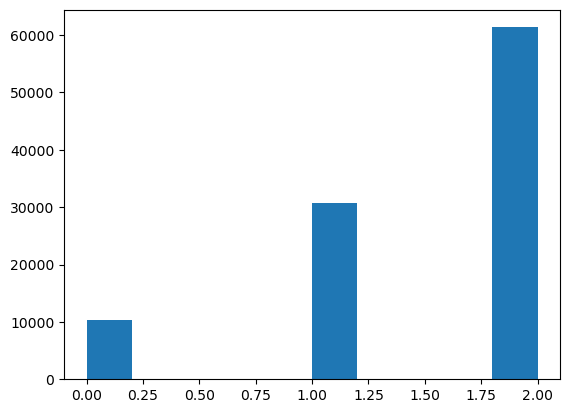

In [11]:
logits = [math.log(0.1), math.log(0.3), math.log(0.6)]
cnt = []
cnt2 = [0]*3
N = 102400
for i in range(N):
    g = [gumbel_inverse_transform(sample()),gumbel_inverse_transform(sample()),gumbel_inverse_transform(sample())]
    j = (torch.Tensor(g) + torch.Tensor(logits)).argmax(dim=-1).item()
    cnt.append(j)
    cnt2[j] += 1
plt.hist(cnt)
print(torch.Tensor(cnt2)/N)

tensor([0.0999, 0.2936, 0.6065])


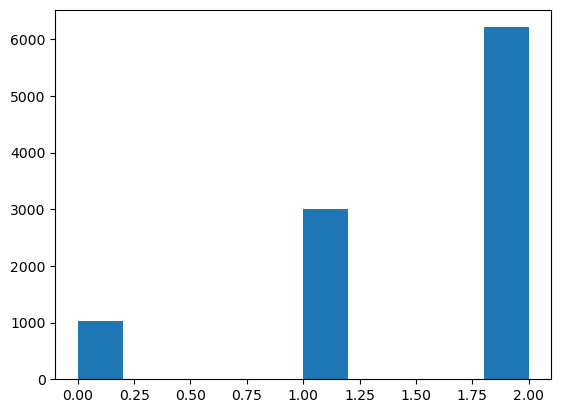

In [12]:
logits = [math.log(0.1), math.log(0.3), math.log(0.6)]
cnt = []
cnt2 = [0]*3
N = 10240
for i in range(N):
    g = gumbel_inverse_transform2(sample3())
    j = (torch.Tensor(g) + torch.Tensor(logits)).argmax(dim=-1).item()
    cnt.append(j)
    cnt2[j] += 1
plt.hist(cnt)
print(torch.Tensor(cnt2)/N)

In [13]:
import yuzu as yz
from yuzu import torch_graph
torch_graph.init()


probs = [0.1, 0.3, 0.6]
logits = yz.from_value([math.log(p) for p in probs])
dist = yz.Categorical(logits)
N = 10240
cnt = [0] * 3
for i in range(N):
    j = (dist.sample((1,)).item())
    cnt[j] += 1
dprobs = [c/N for c in cnt]
print(dprobs)



[0.05712890625, 0.30185546875, 0.641015625]
